In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Credit Card Transactions.csv")

In [5]:
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [8]:
# Delete Unnecessary Column

In [9]:
df = df.drop(['Customer_ID'],axis=1)

In [10]:
# Check all Columns

In [11]:
df.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [7]:
# To check Outliers

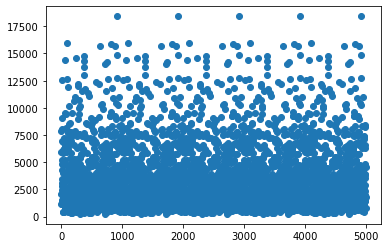

In [13]:
plt.scatter(df.index,df.Credit_Amount)

In [17]:
df['Credit_Amount'].sort_values()

1725      250
3725      250
4725      250
2725      250
725       250
        ...  
3915    18424
915     18424
4915    18424
1915    18424
2915    18424
Name: Credit_Amount, Length: 5000, dtype: int64

In [18]:
# For Bottom 5 Values

In [19]:
df['Credit_Amount'].sort_values()[-5:]

3915    18424
915     18424
4915    18424
1915    18424
2915    18424
Name: Credit_Amount, dtype: int64

In [20]:
# Take index value

In [21]:
df['Credit_Amount'].sort_values()[-5:].index

Int64Index([3915, 915, 4915, 1915, 2915], dtype='int64')

In [22]:
# Now take this index value which is Outlier in list

In [23]:
outlier = df['Credit_Amount'].sort_values()[-5:].index

In [24]:
# Then Drop this Outlier

In [28]:
df = df.drop(outlier,axis=0)

In [29]:
# Now Check

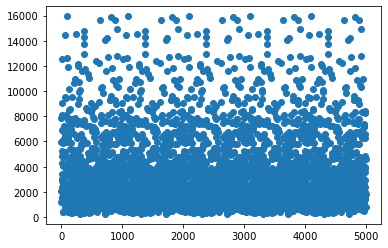

In [30]:
plt.scatter(df.index,df.Credit_Amount)

In [31]:
# Check Correlation

<AxesSubplot:>

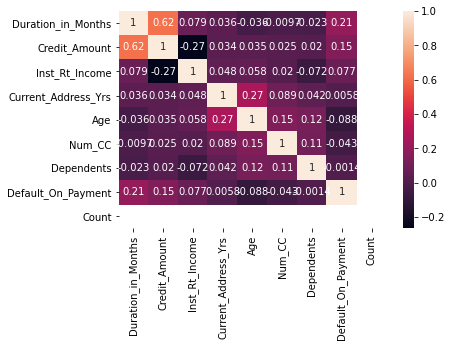

In [33]:

sns.heatmap(df.corr(),annot = True)

In [34]:
# Check Majority & Minority Calss for Balanced & Unbalanced Dataset

In [35]:
df['Default_On_Payment'].value_counts()

0    3505
1    1490
Name: Default_On_Payment, dtype: int64

In [36]:
 # Find that this is Imbalanced dataset

In [39]:
# Now Sampling comes in Study:

# 1) Undersampling : Undersampling is the technique were we have taken majority class sample & remove to balanced it with
#                    minority class
#      Drawback:: Data is Decreased

# 2) Oversampling : Oversapling is the technique in which we hav taken minority class sample & add that minority class sample
#                   or say copy to achieve Majority class data.
#      Drawback : Creates Bias as i would add the same value.

#-------------------------------------------------------------------------------------------#

# Note : Normally Undersampling is Used



In [40]:
# Now Undersampling is used

In [46]:
 li = df[df['Default_On_Payment']==0].sample(2000).index
li

Int64Index([1109,  158, 2290, 4369, 3762, 3046, 3476,  406, 4658, 2520,
            ...
             489, 1136, 3198, 2730, 4994,  411,  202,  950, 4675, 4423],
           dtype='int64', length=2000)

In [47]:
df = df.drop(li,axis=0)

In [48]:
# Now Check the Data:
df['Default_On_Payment'].value_counts()  # Now it is Balanced

0    1505
1    1490
Name: Default_On_Payment, dtype: int64

In [53]:
# Important to rest index value after deletion of index:

df.reset_index(drop = True,inplace = True)

In [54]:
df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,1
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,1
4,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,53,A143,A152,1,A173,1,A191,A201,0,1


In [55]:
# Now convert categorical Data to Numerical Data

In [56]:
from sklearn.preprocessing import LabelEncoder

In [58]:
encoder = LabelEncoder()

for i in df.columns :
    if isinstance(df[i][0],str):
        df[i]=encoder.fit_transform(df[i])

In [59]:
df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,1,48,2,4,5951,0,2,2,1,0,...,22,2,1,1,2,1,0,0,0,1
1,3,12,4,7,2096,0,3,2,2,0,...,49,2,1,1,1,2,0,0,0,1
2,0,42,2,3,7882,0,3,2,2,2,...,45,2,2,1,2,2,0,0,0,1
3,0,24,3,0,4870,0,2,3,2,0,...,53,2,2,2,2,2,0,0,1,1
4,3,24,2,3,2835,2,4,3,2,0,...,53,2,1,1,2,1,0,0,0,1


In [60]:
# Take X & Y :


In [62]:
x =  df.drop('Default_On_Payment',axis=1)
y = df['Default_On_Payment']

# Now Import Model

In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# Logistic Regression


In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

C:\Users\Rakesh Verma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
pred = lr.predict(x_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       317
           1       0.71      0.74      0.72       282

    accuracy                           0.73       599
   macro avg       0.73      0.73      0.73       599
weighted avg       0.73      0.73      0.73       599

